In [ ]:
import tensorflow as tf
import pandas as pd


In [ ]:
data = pd.read_csv("ecg.csv", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [ ]:
data.shape

(4998, 141)

In [ ]:
data.iloc[:, 140].nunique()

2

In [ ]:
data.iloc[:, 140].value_counts() #here anomaly is 0.0

1.0    2919
0.0    2079
Name: 140, dtype: int64

In [ ]:
# 1 = normal, 0= anomaly

# Autoncoder(normal, normal)
# test = normal, abnormal

# if abnormal or anormaly, the error will be %more than threshold



output = 140

features = data.drop(output, axis=1)
target = data[output]

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=12)


In [ ]:
index1 = ytrain[ytrain==1].index
train_data = xtrain.loc[index1]

In [ ]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
count,2341.000000,2341.000000,2341.000000,2341.000000,2341.000000,2341.000000,2341.000000,2341.000000,2341.000000,2341.000000,...,2341.000000,2341.000000,2341.000000,2341.000000,2341.000000,2341.000000,2341.000000,2341.000000,2341.000000,2341.000000
mean,-0.363114,-2.188318,-3.285956,-3.956670,-3.862388,-3.252929,-2.284570,-1.625319,-1.188511,-0.640521,...,0.786358,0.954087,1.040210,1.009256,0.885146,0.619349,0.501843,0.478040,0.556952,-0.530895
std,1.265193,1.425413,1.007282,0.717215,0.567791,0.722397,0.693480,0.466291,0.494758,0.507413,...,0.617147,0.579412,0.564822,0.707281,0.880111,0.992202,1.014683,1.028462,1.033286,1.259144
min,-6.729499,-7.090374,-5.110389,-5.363241,-5.375715,-5.330194,-4.782240,-3.940538,-3.163394,-2.197911,...,-1.927187,-1.897036,-1.858455,-2.312900,-2.595044,-3.122098,-3.736786,-4.644772,-4.252266,-5.094438
25%,-1.230640,-3.196051,-4.027654,-4.415411,-4.194735,-3.745008,-2.774874,-1.834483,-1.530351,-0.990263,...,0.474887,0.727503,0.797492,0.747136,0.524796,0.180468,0.024440,-0.100192,-0.142556,-1.391791
50%,-0.495060,-2.428306,-3.484443,-4.151610,-3.934232,-3.334455,-2.200637,-1.628054,-1.284621,-0.625056,...,0.914641,1.047064,1.112452,1.132088,1.057633,0.824350,0.736966,0.706741,0.740470,-0.471432
75%,0.466564,-1.378322,-2.787035,-3.682342,-3.640484,-2.813190,-1.807586,-1.438637,-0.938966,-0.334908,...,1.196058,1.309012,1.373264,1.437701,1.458331,1.297573,1.191907,1.215522,1.303870,0.384981
max,4.966414,3.351136,1.628389,0.321795,0.566366,0.959135,1.435708,1.471382,1.683730,1.898627,...,2.550441,3.007606,2.797992,2.816664,2.824053,3.071365,3.206815,3.185404,2.900218,3.025085


In [ ]:
from sklearn.preprocessing import MinMaxScaler  #because it preserves range

mm = MinMaxScaler(feature_range=(0,1))
train_scaled = mm.fit_transform(train_data)
test_scaled = mm.transform(xtest)


#fit = learn
#transform = apply

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout


class Autoencoder(Model):
    def __init__(self, decode_units, encode_units):
        super().__init__()
        self.encoder = Sequential([
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(encode_units, activation='relu'),

        ])
        
        self.decoder = Sequential([
            Dense(16, activation='relu'),
            Dense(32, activation='relu'),
            Dense(64, activation='relu'),
            Dense(decode_units, activation='sigmoid'),

        ])
    
    
    def call(self, inputs):
        encoder_output = self.encoder(inputs)
        decoder_output = self.decoder(encoder_output)
        return decoder_output
        
        


In [ ]:
model = Autoencoder(decode_units= train_scaled.shape[1], encode_units=8)

In [ ]:
model.compile(loss= 'msle', metrics=['mse'], optimizer='adam')

In [ ]:
history = model.fit(train_scaled, train_scaled,
         epochs=50,
         batch_size=512,
         validation_data=(test_scaled, test_scaled))

Epoch 1/50
5/5 [==============================] - 0s 24ms/step - loss: 0.0020 - mse: 0.0046 - val_loss: 0.0075 - val_mse: 0.0175
Epoch 2/50
5/5 [==============================] - 0s 12ms/step - loss: 0.0020 - mse: 0.0045 - val_loss: 0.0075 - val_mse: 0.0174
Epoch 3/50
5/5 [==============================] - 0s 11ms/step - loss: 0.0019 - mse: 0.0043 - val_loss: 0.0074 - val_mse: 0.0171
Epoch 4/50
5/5 [==============================] - 0s 13ms/step - loss: 0.0019 - mse: 0.0042 - val_loss: 0.0074 - val_mse: 0.0173
Epoch 5/50
5/5 [==============================] - 0s 12ms/step - loss: 0.0018 - mse: 0.0041 - val_loss: 0.0073 - val_mse: 0.0169
Epoch 6/50
5/5 [==============================] - 0s 11ms/step - loss: 0.0018 - mse: 0.0040 - val_loss: 0.0071 - val_mse: 0.0166
Epoch 7/50
5/5 [==============================] - 0s 11ms/step - loss: 0.0018 - mse: 0.0039 - val_loss: 0.0069 - val_mse: 0.0162
Epoch 8/50
5/5 [==============================] - 0s 12ms/step - loss: 0.0017 - mse: 0.0038 - val

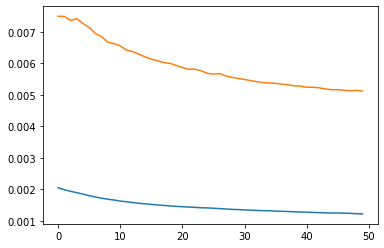

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
import numpy as np
def threshold(model, train_scaled):
    pred_train = model.predict(train_scaled)
    error = tf.keras.losses.msle(pred_train,train_scaled )
    
    threshold1 = np.mean(error.numpy())+ np.std(error.numpy())
    return threshold1 

In [ ]:
def prediction_test(model, test_scaled, threshold1):
    pred_test = model.predict(test_scaled)
    error_test = tf.keras.losses.msle(pred_test,test_scaled )
    
    anamolies = pd.Series(error_test)> threshold1
    prediction= anamolies.map(lambda x: 0.0 if x==True else 1.0)
    return prediction

In [ ]:
th = threshold(model, train_scaled)

In [ ]:
pred = prediction_test(model, test_scaled, th)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, pred)

In [ ]:
pred